# ***Support Vector Machine(SVM)***

In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import seaborn as sns


## Upload Data


In [144]:
df=pd.read_csv("data/heart_disease.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [145]:
header = df.head()
header

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## Train 4 models using different methods of scalling data
### ***None , StandardScaler,  MinMaxScaler ,  MaxAbsScaler***


In [146]:
X=df.drop(columns=["target"])
y=df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.3,random_state=42)

X_train_initial = X_train.copy()
X_test_initial = X_test.copy()

In [147]:
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)


scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)


scaler_maxabs = MaxAbsScaler()
X_train_maxabs = scaler_maxabs.fit_transform(X_train)
X_test_maxabs = scaler_maxabs.transform(X_test)


In [148]:
def train_evaluate_svm(X_train, X_test, y_train, y_test, kernel='rbf'):
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return svm, accuracy

In [149]:
results = {}

svm_initial, acc_initial = train_evaluate_svm(X_train_initial, X_test_initial, y_train, y_test)
results['Initial'] = acc_initial

# StandardScaler
svm_std, acc_std = train_evaluate_svm(X_train_std, X_test_std, y_train, y_test)
results['StandardScaler'] = acc_std

# MinMaxScaler
svm_minmax, acc_minmax = train_evaluate_svm(X_train_minmax, X_test_minmax, y_train, y_test)
results['MinMaxScaler'] = acc_minmax

# MaxAbsScaler
svm_maxabs, acc_maxabs = train_evaluate_svm(X_train_maxabs, X_test_maxabs, y_train, y_test)
results['MaxAbsScaler'] = acc_maxabs



In [150]:
results_df = pd.DataFrame({
    'Scaler': ['Initial', 'StandardScaler', 'MinMaxScaler', 'MaxAbsScaler'],
    'Accuracy': [results['Initial'], results['StandardScaler'], 
                results['MinMaxScaler'], results['MaxAbsScaler']]
})

print("\nAccuracy Comparison Table:")
print(results_df)



Accuracy Comparison Table:
           Scaler  Accuracy
0         Initial  0.725490
1  StandardScaler  0.885154
2    MinMaxScaler  0.885154
3    MaxAbsScaler  0.882353


### ***Conclusion*** 
#### I got again interesting results and the main cause is: all 3 algorithms have similar scaling principles that why result is the same.
#### Another thing what I noticed is that SVC from sklearn uses some smart defaults: it automatically scales the gamma parameter based on the variance of the data:

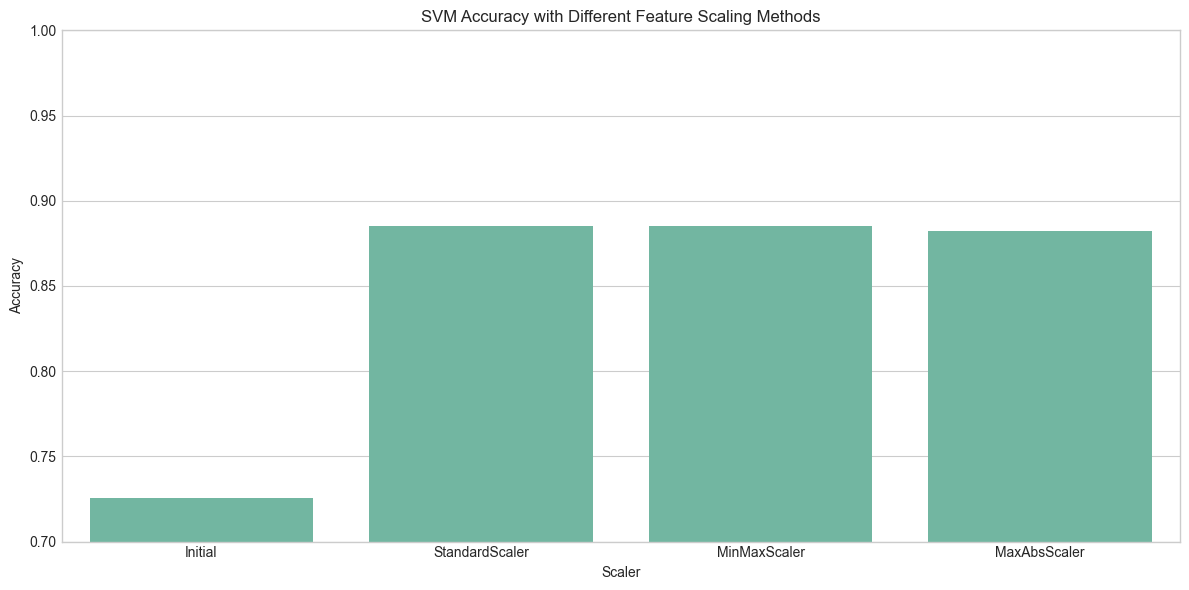

In [151]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Scaler', y='Accuracy', data=results_df)
plt.title('SVM Accuracy with Different Feature Scaling Methods')
plt.ylim(0.7, 1.0)  
plt.tight_layout()

In [ ]:
def plot_svm_kernel_comparison(X_train, X_test, y_train, y_test, feature_indices=[0, 1], figsize=(14, 10)):
    """
    Plot decision boundaries for SVM models with different kernels using two selected features.
    
    Parameters:
    -----------
    X_train, X_test: training and test feature matrices
    y_train, y_test: training and test target values
    feature_indices: indices of two most correlated features to visualize
    figsize: figure size
    """

    X_train_2d = X_train[:, feature_indices]
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    
    h = 0.02 
    x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
    y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.flatten()
    
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    accuracy_scores = []
    
    for i, kernel in enumerate(kernels):
        svm = SVC(kernel=kernel, random_state=42)
        svm.fit(X_train_2d, y_train)
        
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        X_test_2d = X_test[:, feature_indices]
        y_pred = svm.predict(X_test_2d)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        
        axes[i].contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
        scatter = axes[i].scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, 
                                 cmap=cmap_bold, edgecolors='k', s=40)
        axes[i].set_title(f'Kernel: {kernel} (Accuracy: {accuracy:.4f})')
        axes[i].set_xlabel(f'Feature {feature_indices[0]}')
        axes[i].set_ylabel(f'Feature {feature_indices[1]}')
    
    plt.legend(*scatter.legend_elements(), title="Classes", loc="lower right")
    plt.tight_layout()
    
    plt.figure(figsize=(10, 6))
    plt.bar(kernels, accuracy_scores, color='skyblue')
    plt.ylim(0.7, 1.0)
    plt.title('SVM Accuracy Comparison (2-feature model): Different Kernels')
    plt.xlabel('Kernel Type')
    plt.ylabel('Accuracy')
    
    return accuracy_scores


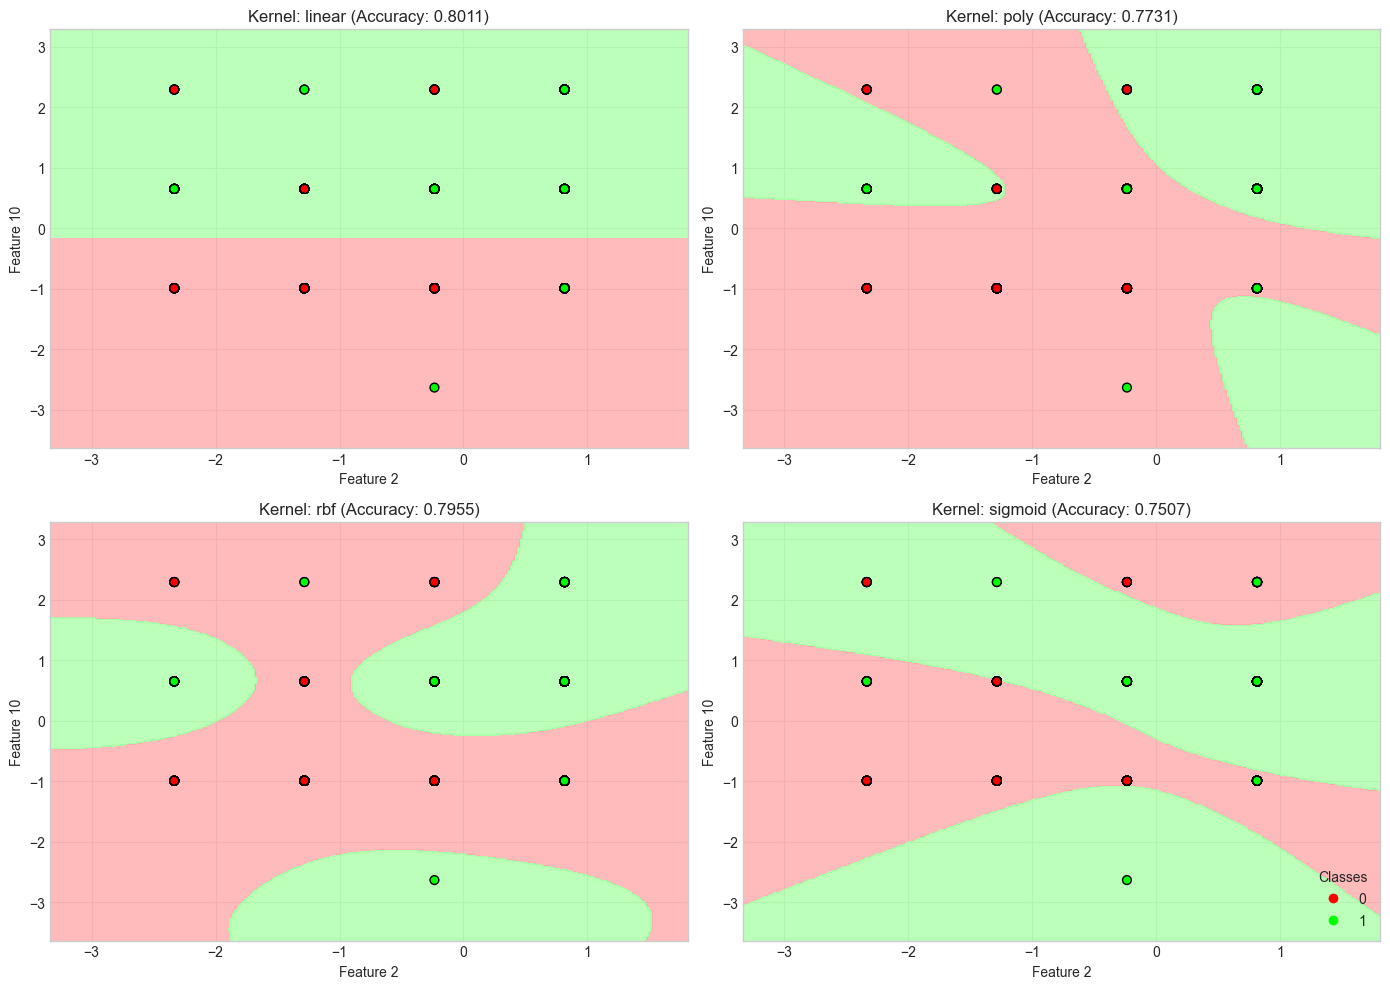

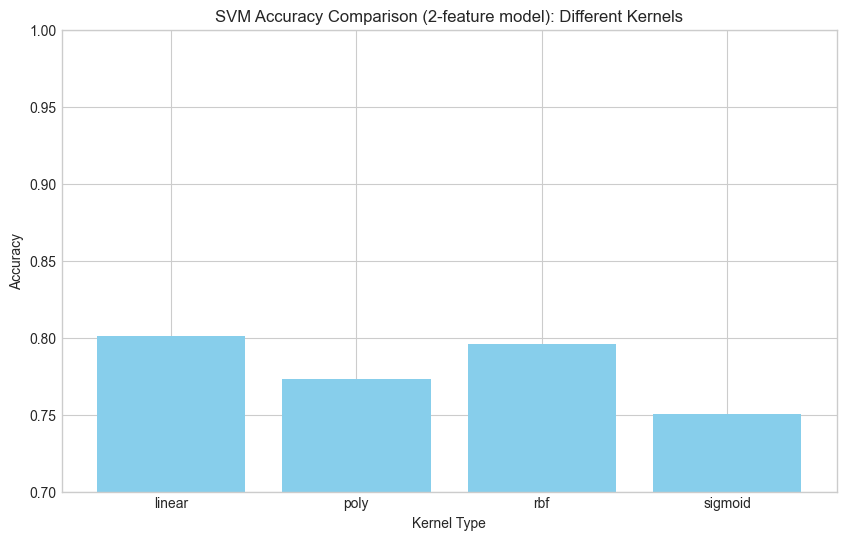

In [153]:
from sklearn.feature_selection import mutual_info_classif

feature_importance = mutual_info_classif(X_train, y_train)
top_features = np.argsort(feature_importance)[-2:]

# Plot decision boundaries and accuracy for different kernels using the two most important features
accuracy_scores_2d = plot_svm_kernel_comparison(X_train_std, X_test_std, y_train, y_test, 
                                              feature_indices=top_features)

# Conclusion

## Feature Scaling Effects on SVM Performance

- First step to do when you are working with SVM is to scale data almost in the all situations StandartScaler is the best option the following would be MixMaxScaler and MaxAbsScaler.In my situation almost are no difference between these 3 algorithms but in other cases may have different behavior but StandartScaler is also best optimized for other algorithms.

- Scaling ensures that all features are on the same scale this permits to boundaries to be well determined (as we saw in the graph above).
---

## Key SVM Strengths

- Good choice when (number of features > number of samples).
- Interesting Fact: Sometimes SVMs algorithms give a better results as neural networks on small datasets,this happens because neural networks are intended to be used on large datasets. 

---

## 💡 Tips

-  Use **Stadart Scaler** 
-  For complex datasets, use **RBF kernel** because it can capture complex nonlinear relationships and maps data in a different way specifically for use with large datasets.
